# Class Statistics for each Annotation Type of the Fine-tuning Datasets

This notebook generates class distribution plots for the labels of each of the different fine-tuning datasets, which were previously filtered by their majority classes. Here, the IDs are manually mapped to the respective textual descriptors, based on their ontologies.  

In [15]:
# Imports 
import getpass
import os
import sys
import time

import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

from stonkgs.constants import (
    CELL_LINE_DIR,
    CELL_TYPE_DIR,
    DISEASE_DIR,
    LOCATION_DIR,
    ORGAN_DIR,
    SPECIES_DIR,
    VISUALIZATIONS_DIR,
)

Record user details

In [2]:
print(getpass.getuser())
print(sys.version)
print(time.asctime())

hbalabin
3.8.8 (default, Feb 24 2021, 21:46:12) 
[GCC 7.3.0]
Mon May 10 22:08:12 2021


## 1. Load all the filtered datasets

In [16]:
# Load all the dataframes
cell_line_df = pd.read_csv(os.path.join(CELL_LINE_DIR, 'cell_line_filtered.tsv'), sep='\t', converters={'class': lambda x: str(x)})
cell_type_df = pd.read_csv(os.path.join(CELL_TYPE_DIR, 'cell_type_filtered.tsv'), sep='\t', converters={'class': lambda x: str(x)})
disease_df = pd.read_csv(os.path.join(DISEASE_DIR, 'disease_filtered.tsv'), sep='\t', converters={'class': lambda x: str(x)})
location_df = pd.read_csv(os.path.join(LOCATION_DIR, 'location_filtered.tsv'), sep='\t', converters={'class': lambda x: str(x)})
organ_df = pd.read_csv(os.path.join(ORGAN_DIR, 'organ_filtered.tsv'), sep='\t', converters={'class': lambda x: str(x)})
species_df = pd.read_csv(os.path.join(SPECIES_DIR, 'species_filtered.tsv'), sep='\t', converters={'class': lambda x: str(x)})

all_dfs = [
    cell_line_df, 
    cell_type_df, 
    disease_df, 
    location_df, 
    organ_df, 
    species_df,
]

Manually created dictionaries for mapping the IDs

In [17]:
cell_line_dict = {
    '0003684': 'HeLa cell',  
    '0007606': 'MCF7 cell', 
    '0002795': 'DMS 114 cell', 
    '0001230': 'HEK293 cell', 
    '0008172': 'NIH-3T3 cell', 
    '0003704': 'Hep G2 cell', 
    '0009465': 'U-937 cell', 
    '0007365': 'LNCAP cell', 
    '0002596': 'COS-1 cell', 
    '0009348': 'THP-1 cell',
}

cell_type_dict = {
    '0000007': 'early embryonic cell (metazoa)', 
    '0000057': 'fibroblast', 
    '0000235': 'macrophage', 
    '0000567': 'polymodal nocireceptor', 
    '0000938': 'CD56-bright natural killer cell', 
    '0000115': 'endothelial cell', 
    '0000150': 'glandular epithelial cell', 
    '0000192': 'smooth muscle cell', 
    '0000136': 'fat cell', 
    '0000182': 'hepatocyte',
}

disease_dict = {
    '1324': 'lung cancer', 
    '1936': 'atherosclerosis', 
    '1612': 'breast cancer', 
    '9538': 'multiple myeloma', 
    '1240': 'leukemia', 
    '219': 'colon cancer', 
    '1909': 'melanoma', 
    '769': 'neuroblastoma', 
    '3908': 'lung non-small cell carcinoma', 
    '3347': 'osteosarcoma',
}

location_dict = {
    'D002467': 'Cell Nucleus', 
    'D002462': 'Cell Membrane', 
    'D003593': 'Cytoplasm', 
    'D005109': 'Extracellular Matrix', 
    'D005110': 'Extracellular Space',
}

organ_dict = {
    '0002048': 'lung', 
    '0002107': 'liver', 
    '0001986': 'endothelium', 
    '0001134': 'skeletal muscle tissue',
    '0000483': 'epithelium', 
    '0000947': 'aorta', 
    '0000310': 'breast', 
    '0000142': 'mechanosensory system',  # cross reference from BILA 
     # https://www.ebi.ac.uk/ols/ontologies/uberon/terms?iri=http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FUBERON_0007037
    '0002367': 'prostate gland',
    '0000948': 'heart',
}

species_dict = {
    '9606': 'human', 
    '10090': 'mouse', 
    '10116': 'rat',
}

all_dicts = [cell_line_dict, cell_type_dict, disease_dict, location_dict, organ_dict, species_dict]

Replace IDs with the names from these dictionaries

In [18]:
for annot_dict, df in zip(all_dicts, all_dfs):
    df.replace(annot_dict, inplace=True)

## 2. Plot the class distribution

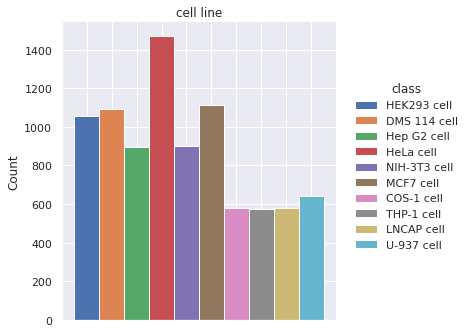

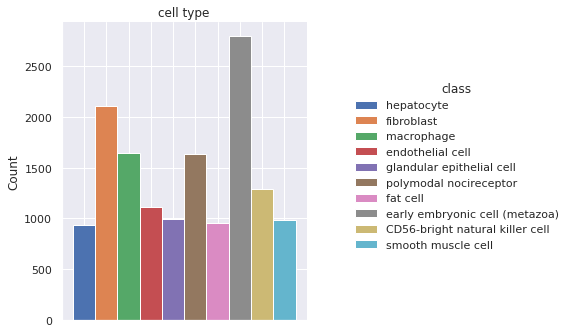

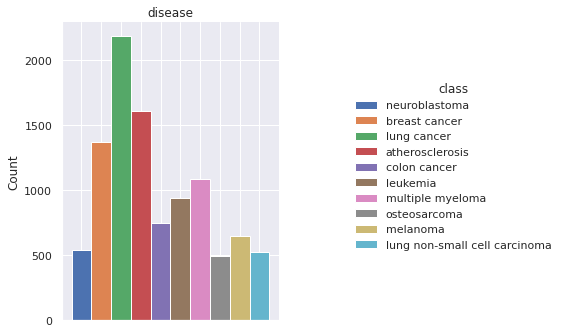

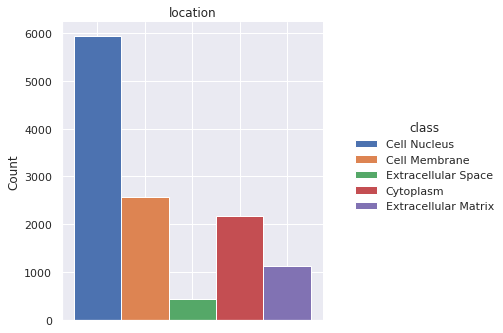

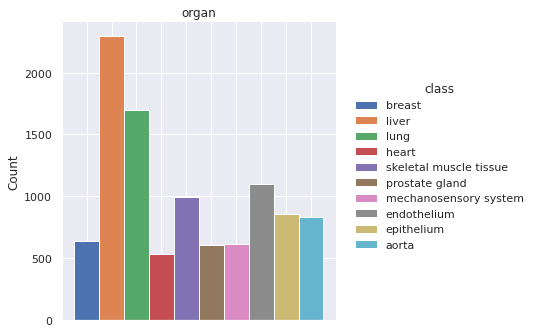

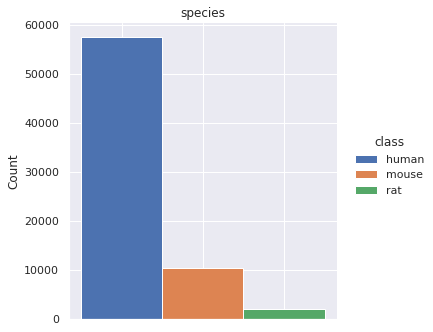

In [22]:
# Set style options
sns.set_style("whitegrid")
sns.set(font_scale=1)

# Names for plotting
names = ['cell line', 'cell type', 'disease', 'location', 'organ', 'species']

# Iterate through all dfs
f, axes = plt.subplots(3, 2)
for name, df in zip(names, all_dfs):
    class_plot = sns.displot(df, x='class', hue='class', alpha=1, ax=axes[])
    class_plot.set(xticklabels=[], title=name, xlabel=None)
    plt.savefig(os.path.join(VISUALIZATIONS_DIR, name + '_class_dist.png'), dpi=300, bbox_inches = "tight")